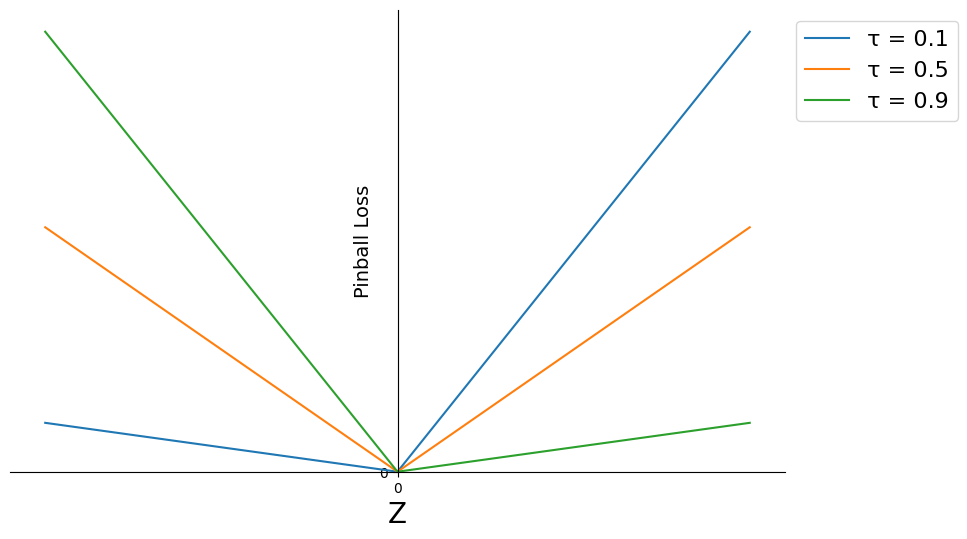

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pinball loss function
def pinball_loss(y_true, y_pred, quantile):
    """
    Compute the Pinball Loss for a given quantile.
    :param y_true: the true value
    :param y_pred: the predicted value
    :param quantile: the quantile (tau)
    :return: pinball loss
    """
    return np.maximum((y_true - y_pred) * quantile, (y_pred - y_true) * (1 - quantile))

# Define the quantiles
quantiles = [0.1, 0.5, 0.9]

# Create a grid of y - y_hat values (where y_hat is the predicted value and y is the true value)
y_minus_y_hat = np.linspace(-2, 2, 400)

# Calculate the loss for each y - y_hat value and quantile
# Since we want the loss to always be positive, we will take the absolute value of the loss
losses = np.abs(np.array([[pinball_loss(0, diff, q) for diff in y_minus_y_hat] for q in quantiles]))

# Plotting the losses with the y-axis starting from 0
plt.figure(figsize=(10, 6))

for i, q in enumerate(quantiles):
    plt.plot(y_minus_y_hat, losses[i], label=f'τ = {q}')

# Set labels with font sizes
plt.xlabel('Z', fontsize=20)
plt.ylabel('Pinball Loss', fontsize=14)

# Move y-axis to the center and set the limit to 0 and above
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('none')
plt.gca().set_ylim(bottom=0)

# Display ticks only where x is 0 or y is 0
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xticks([0])
plt.yticks([0])

# Set legend with font size, and place it outside the plot
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1))

# Remove title
plt.title('')

plt.grid(True)
plt.show()